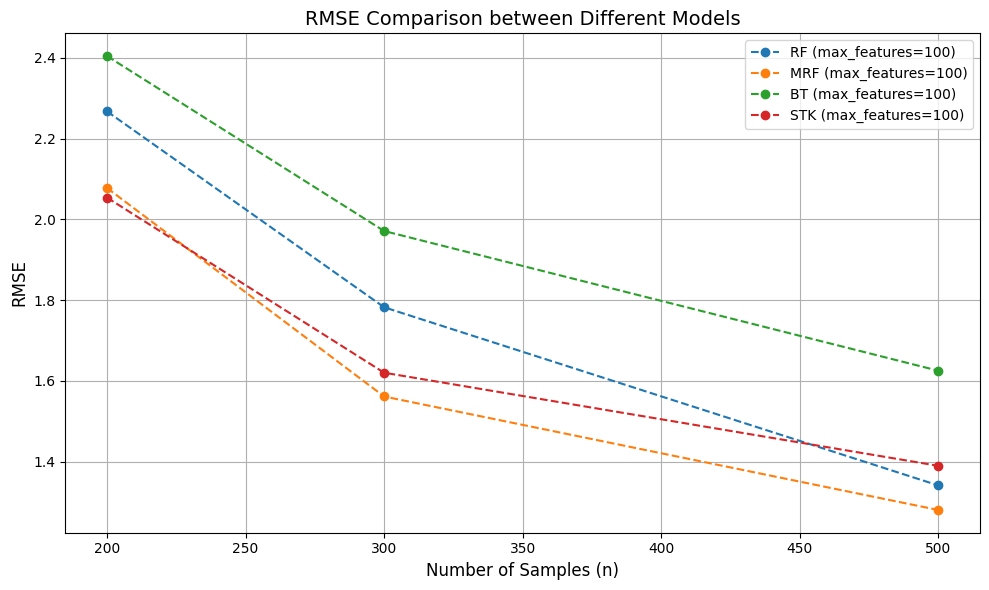

In [5]:
import os
import json
import matplotlib.pyplot as plt

# 设置文件夹路径
results_folder = "simulation_results7"

# 初始化存储数据的结构
visualization_data = {}

# 遍历所有 JSON 文件
for file_name in os.listdir(results_folder):
    #if file_name.endswith(".json") and "DGP1" in file_name:
    #if file_name.endswith(".json") and "DGP2" in file_name:
    if file_name.endswith(".json") and "DGP3" in file_name:
        file_path = os.path.join(results_folder, file_name)
        
        # 读取 JSON 数据
        with open(file_path, "r") as f:
            data = json.load(f)
        
        # 提取参数和结果
        params = data["params"]
        rmse_rf_list = data["rmse_rf_list"]
        rmse_mrf_list = data["rmse_mrf_list"]
        rmse_bt_list = data["rmse_bt_list"]
        rmse_stk_list = data["rmse_stk_list"]
        rmse_mlp_list = data["rmse_mlp_list"]
        
        # 计算平均 RMSE
        avg_rmse_rf = sum(rmse_rf_list) / len(rmse_rf_list)
        avg_rmse_mrf = sum(rmse_mrf_list) / len(rmse_mrf_list)
        avg_rmse_bt = sum(rmse_bt_list) / len(rmse_bt_list)
        avg_rmse_stk = sum(rmse_stk_list) / len(rmse_stk_list)
        avg_rmse_mlp = sum(rmse_mlp_list) / len(rmse_mlp_list)
        
        # 按 max_features 分类存储数据
        max_features = params["max_features"]
        n = params["n"]
        
        if max_features not in visualization_data:
            visualization_data[max_features] = {"n": [], "rmse_rf": [], "rmse_mrf": [], "rmse_bt": [], "rmse_stk": [], "rmse_mlp": []}
        
        visualization_data[max_features]["n"].append(n)
        visualization_data[max_features]["rmse_rf"].append(avg_rmse_rf)
        visualization_data[max_features]["rmse_mrf"].append(avg_rmse_mrf)
        visualization_data[max_features]["rmse_bt"].append(avg_rmse_bt)
        visualization_data[max_features]["rmse_stk"].append(avg_rmse_stk)
        visualization_data[max_features]["rmse_mlp"].append(avg_rmse_mlp)

# 绘制图像
plt.figure(figsize=(10, 6))
for max_features, data in visualization_data.items():
    sorted_indices = sorted(range(len(data["n"])), key=lambda i: data["n"][i])
    n_sorted = [data["n"][i] for i in sorted_indices]
    rmse_rf_sorted = [data["rmse_rf"][i] for i in sorted_indices]
    rmse_mrf_sorted = [data["rmse_mrf"][i] for i in sorted_indices]
    rmse_bt_sorted = [data["rmse_bt"][i] for i in sorted_indices]
    rmse_stk_sorted = [data["rmse_stk"][i] for i in sorted_indices]
    rmse_mlp_sorted = [data["rmse_mlp"][i] for i in sorted_indices]

    plt.plot(n_sorted, rmse_rf_sorted, label=f"RF (max_features={max_features})", linestyle="--", marker="o")
    plt.plot(n_sorted, rmse_mrf_sorted, label=f"MRF (max_features={max_features})", linestyle="--", marker="o")
    plt.plot(n_sorted, rmse_bt_sorted, label=f"BT (max_features={max_features})", linestyle="--", marker="o")
    plt.plot(n_sorted, rmse_stk_sorted, label=f"STK (max_features={max_features})", linestyle="--", marker="o")
    #plt.plot(n_sorted, rmse_mlp_sorted, label=f"MLP (max_features={max_features})", linestyle="--", marker="o")

plt.xlabel("Number of Samples (n)", fontsize=12)
plt.ylabel("RMSE", fontsize=12)
plt.title("RMSE Comparison between Different Models", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()